In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [76]:
# Load the CSV file
file_path = '/content/Zomato-data-.csv'
df = pd.read_csv(file_path)

In [77]:
# Display basic info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [78]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             votes  approx_cost(for two people)
count   148.000000                   148.000000
mean    264.810811                   418.243243
std     653.676951                   223.085098
min       0.000000                   100.000000
25%       6.750000                   200.000000
50%      43.500000                   400.000000
75%     221.750000                   600.000000
max    4884.000000                   950.000000


In [79]:
# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [80]:
# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


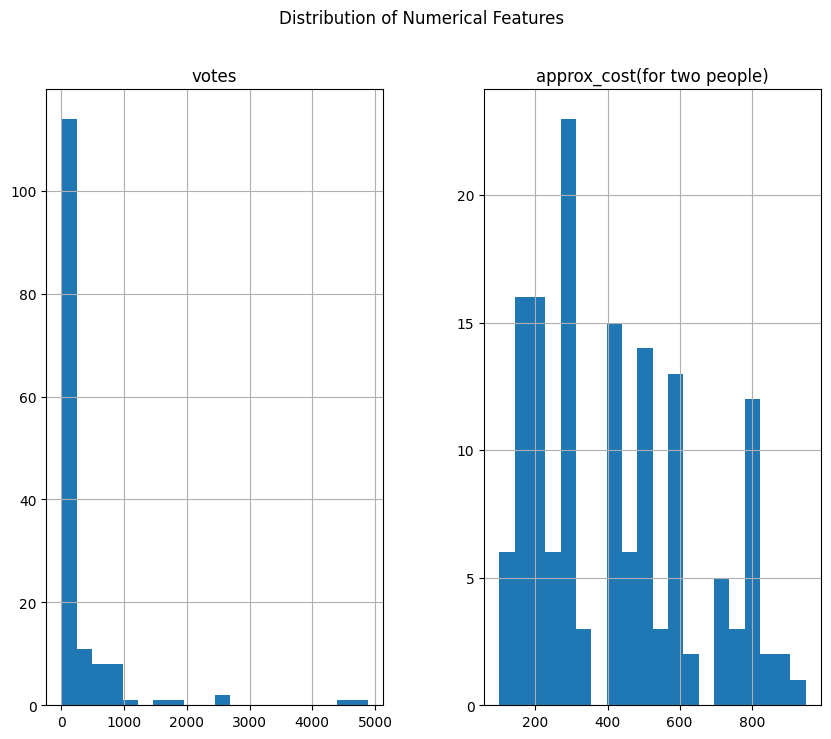

In [81]:
# Plot distribution of numerical features if available
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
if numerical_cols:
    df[numerical_cols].hist(figsize=(10, 8), bins=20)
    plt.suptitle("Distribution of Numerical Features")
    plt.show()

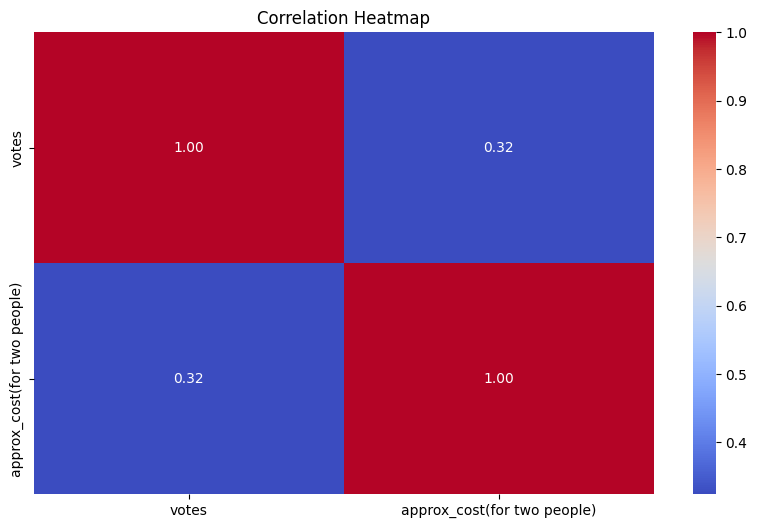

In [82]:
# Correlation heatmap if multiple numerical columns exist
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()

In [83]:
# Display unique values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
    print("\nUnique values in categorical columns:")
    for col in categorical_cols:
        print(f"{col}: {df[col].nunique()} unique values")


Unique values in categorical columns:
name: 145 unique values
online_order: 2 unique values
book_table: 2 unique values
rate: 20 unique values
listed_in(type): 4 unique values


<ipython-input-84-0cb34a42bf27>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rate', y='name', data=top_10_lowest, palette='magma')


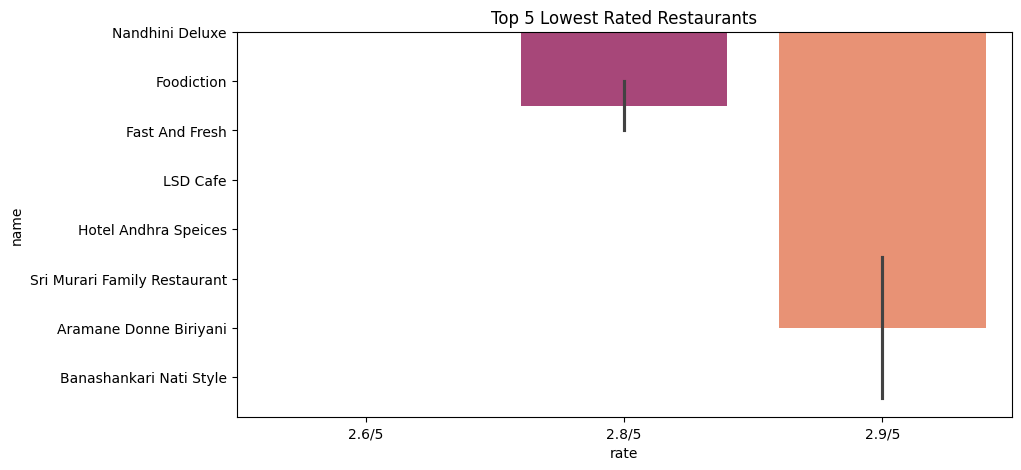

In [84]:
# Top 10 lowest-rated restaurants
if 'rate' in df.columns and 'name' in df.columns:
    top_10_lowest = df[['name', 'rate']].sort_values(by='rate', ascending=True).head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x='rate', y='name', data=top_10_lowest, palette='magma')
    plt.xlabel("rate")
    plt.ylabel("name")
    plt.title("Top 5 Lowest Rated Restaurants")
    plt.show()

<ipython-input-85-9979f52b35e8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rate', y='name', data=top_restaurants, palette='coolwarm')


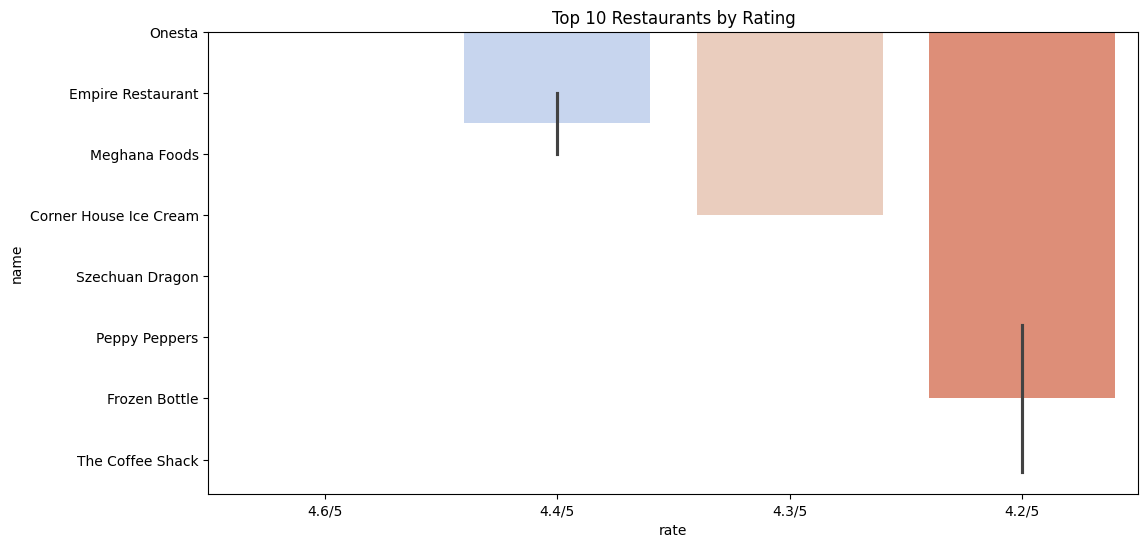

In [85]:
# Bar Chart: Rating vs. Restaurant Name
if 'rate' in df.columns and 'name' in df.columns:
    plt.figure(figsize=(12, 6))
    top_restaurants = df[['name', 'rate']].dropna().sort_values(by='rate', ascending=False).head(10)
    sns.barplot(x='rate', y='name', data=top_restaurants, palette='coolwarm')
    plt.xlabel("rate")
    plt.ylabel("name")
    plt.title("Top 10 Restaurants by Rating")
    plt.show()

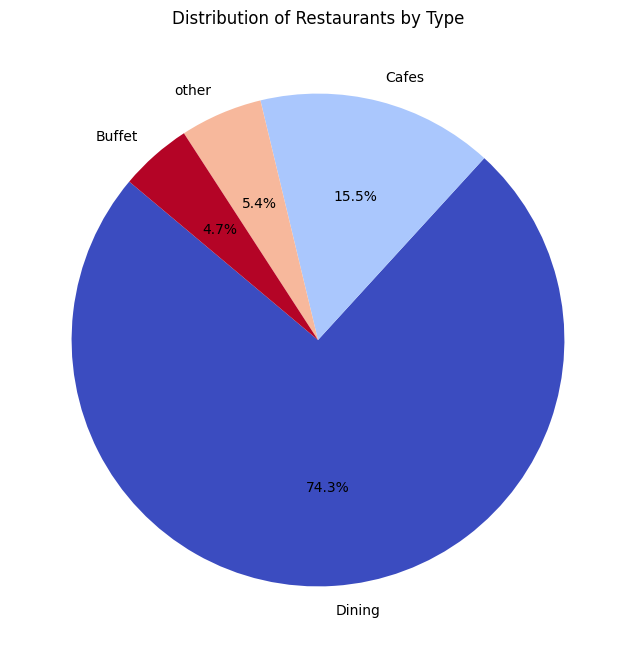

In [86]:
# Pie Chart for Listed In (Type)
if 'listed_in(type)' in df.columns:
    listed_in_counts = df['listed_in(type)'].value_counts()
    plt.figure(figsize=(8, 8))
    # Get a list of colors from the coolwarm colormap
    num_slices = len(listed_in_counts)  # Get the number of slices
    colors = plt.cm.coolwarm(np.linspace(0, 1, num_slices))

    plt.pie(listed_in_counts, labels=listed_in_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title("Distribution of Restaurants by Type")
    plt.show()